<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/DerivativesApplications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applications of Derivatives

#### Setup

In [1]:
!git clone https://github.com/pareshrchaudhary/numericalmethods.git

fatal: destination path 'numericalmethods' already exists and is not an empty directory.


In [6]:
import sys
sys.path.append("/content/numericalmethods")
import numpy as np
import matplotlib.pyplot as plt
import math
from numericalmethods.derivatives import Derivative, Element

## 1) Approximation

### 1.1) Linear Approximation

Let's approximate squareroot of a $16.3$-


If we were to guess the square root, then it would be pretty close to $4$.   
How do we do it? We check the closest perfect sqare root value and make an estimate.   
$\sqrt{16.3} ≈ 4$


To estimate $\sqrt{16.3}$ let's draw a tangent line at $\sqrt{16}$ and use the equation of the tangent line to approximate our desired value.

In [8]:
def f(x):
  return math.sqrt(x)

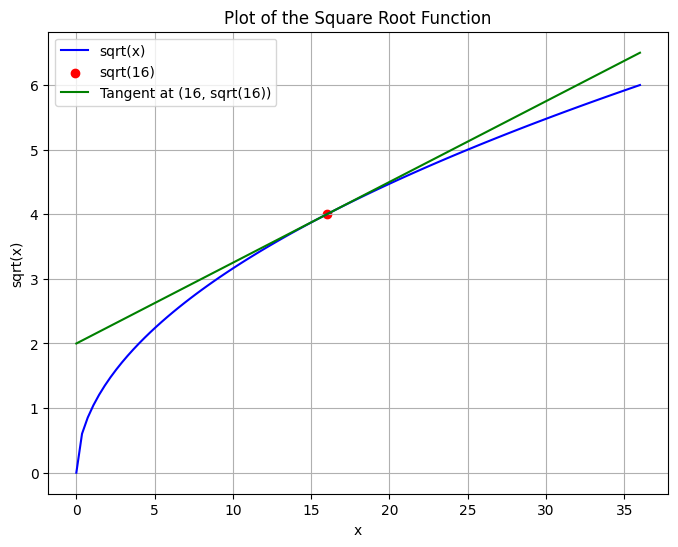

In [11]:
x = np.linspace(0, 36, 100)
y = np.sqrt(x)

x_point = 16
y_point = np.sqrt(x_point)
slope = 0.5 / np.sqrt(x_point)
tangent_y = slope * (x - x_point) + y_point

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='sqrt(x)', color='blue')
plt.scatter([16], [4], color='red', label='sqrt(16)')
plt.plot(x, tangent_y, color='green', label='Tangent at (16, sqrt(16))')

plt.xlabel('x')
plt.ylabel('sqrt(x)')
plt.title('Plot of the Square Root Function')
plt.grid(True)
plt.legend()
plt.show()

Equation of the tangent line is given by $y-y_1 = m(x-x_1)$ where $m$ is slope of the line.

Plugging it the information we have - $y-4 = m(x-16)$.  

What do we do about slope $m$? We take derivative of $f(x)$ at $x=16$.

In [12]:
dx = Derivative(f)
m = dx.differentiate(16)

In [13]:
y = m * (16.3 - 16) + 4
print(y)

4.0375


$\sqrt(16) = 4.0375$

To linearly approximate a function $f(x)$ at a point $x_{new}$ near $x_{old}$ we have  
$\boxed{f(x_{new}) = f'(x_{old}) * (x_{new} - x_{old}) + f(x_{old})}$

_Note: This approximation works only when both the values are closer._

### 1.2) Quadratic Approximation

### 1.3) Newton's Method

## 2) Graphing and critical points: 1st and 2nd derivative tests

## 3) Optimization: max min problems